In [4]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("new_college_auth.csv")
df.head()

,Unnamed: 0,name,domain,SPF,DMARC,DKIM
0,0,Anhui Medical University,ahmu.edu.cn,True,False,False
1,1,Anhui Normal University,ahnu.edu.cn,True,True,False
2,2,Anhui Technical College of Water Resources and...,ahsdxy.ah.edu.cn,False,False,False
3,3,Anhui University of Traditional Chinese Medicine,ahtcm.edu.cn,True,True,False
4,4,Anhui University,ahu.edu.cn,True,True,False


In [9]:
len(df)

395

SPF
True     236
False    159
dtype: int64

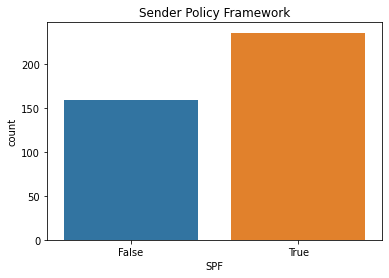

In [13]:
sns.countplot(data=df, x="SPF")
plt.title("Sender Policy Framework")
df.value_counts("SPF")

DMARC
False    300
True      95
dtype: int64

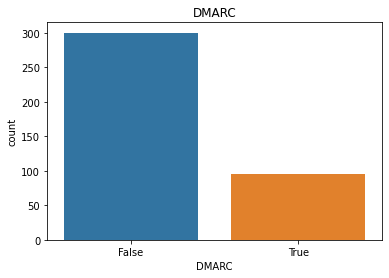

In [14]:
sns.countplot(data=df, x="DMARC")
plt.title("DMARC")
df.value_counts("DMARC")

DKIM
False    394
True       1
dtype: int64

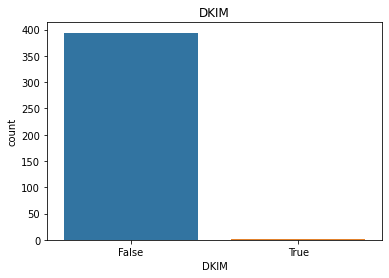

In [15]:
# set selector as "mail"
sns.countplot(data=df, x="DKIM")
plt.title("DKIM")
df.value_counts("DKIM")

In [48]:
# Here we just care about two approaches of authentication: SPF and DMARC since we cannot identify the selector for DKIM

def check_auth(row):
  if row["SPF"] and row["DMARC"]:
    return "both"
  elif row["SPF"]:
    return "SPF"
  elif row["DMARC"]:
    return "DMARC"
  else:
    return "Neither"
  
df["auth"] = df.apply(lambda x: check_auth(x), axis=1)

In [49]:
df

,Unnamed: 0,name,domain,SPF,DMARC,DKIM,auth
0,0,Anhui Medical University,ahmu.edu.cn,True,False,False,SPF
1,1,Anhui Normal University,ahnu.edu.cn,True,True,False,both
2,2,Anhui Technical College of Water Resources and...,ahsdxy.ah.edu.cn,False,False,False,Neither
3,3,Anhui University of Traditional Chinese Medicine,ahtcm.edu.cn,True,True,False,both
4,4,Anhui University,ahu.edu.cn,True,True,False,both
...,...,...,...,...,...,...,...
390,390,Guangzhou College of South China University of...,stu.gcu.edu.cn,True,False,False,SPF
391,391,Xihua University,xhu.edu.cn,False,False,False,Neither
392,392,Nanjing University of Information Science and ...,nuist.edu.cn,True,False,False,SPF
393,393,Luoyang Normal University,lynu.edu.cn,False,False,False,Neither


auth
DMARC        6
Neither    153
SPF        147
both        89
Name: name, dtype: int64


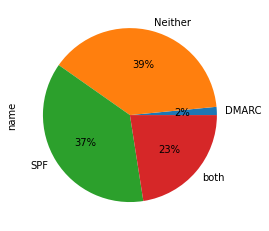

In [51]:
df_auth = df.groupby(['auth']).count()['name']
print(df_auth)
df_auth.plot(kind="pie", y="Unnamed: 0", autopct='%1.0f%%')